In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [484]:
df = pd.read_csv('data/full_medal_data.csv')
sex = pd.read_csv('data/summerOly_athletes.csv')[['NOC', 'Year', 'Sex']].sort_values(by=['NOC', 'Year']).reset_index(drop=True)
sex = sex.groupby(['NOC', 'Year'])['Sex'].apply(lambda x: (x == 'M').mean()).reset_index()
events = pd.read_csv('data/summerOly_programs.csv').loc[71].reset_index()[4:].rename(columns={'index': 'Year', 71: 'Events'}).astype({'Events': 'int32'})
events['Year'] = events['Year'].str.replace('*', '')
events['Difference'] = events['Events'].diff().fillna(0)
events = events.astype({'Year': 'int32'}).reset_index(drop=True)

for i in range(len(events)):
    df.loc[df['Year'] == events.loc[i, 'Year'], 'Events Difference'] = events.loc[i, 'Difference']
    

df = df.sort_values(by=['Country Code', 'Year']).reset_index(drop=True)

countries = df['Country Code'].unique()
for country_name in countries:
    country = df[df['Country Code'] == country_name]
    diff = country[['Team Size']].diff().fillna(0)

    df.loc[df['Country Code'] == country_name, 'Team Size Diff'] = diff.loc[:, 'Team Size']

    df.loc[df['Country Code'] == country_name, 'Rolling Mean Team Size'] = df[['Team Size']].rolling(window=5, min_periods=1).mean().loc[:, 'Team Size']
    df.loc[df['Country Code'] == country_name, 'Rolling Dev Team Size'] = df[['Team Size']].rolling(window=5, min_periods=1).std().loc[:, 'Team Size']
    
    df.loc[df['Country Code'] == country_name, 'Rolling Mean Participated Events'] = df[['Participated Events']].rolling(window=5, min_periods=1).mean().loc[:, 'Participated Events']
    df.loc[df['Country Code'] == country_name, 'Rolling Dev Participated Events'] = df[['Participated Events']].rolling(window=5, min_periods=1).std().loc[:, 'Participated Events']


df['Normalized Team Size'] = (df['Team Size'] - df['Rolling Mean Team Size']) / df['Rolling Dev Team Size']
df['Normalized Participated Events'] = (df['Participated Events'] - df['Rolling Mean Participated Events']) / df['Rolling Dev Participated Events']

for i in range(len(df)):
    sex_country_yr = sex[(sex['NOC'] == df.loc[i,'Country Code']) & (sex['Year'] == df.loc[i,'Year'])]
    if len(sex_country_yr) == 0:
        continue
    df.loc[i,'Sex'] = sex_country_yr.iloc[0, 2]
df = df.dropna().reset_index(drop=True)
df.where(df['NOC'] == 'Argentina').dropna()

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,...,Total Events,Events Difference,Team Size Diff,Rolling Mean Team Size,Rolling Dev Team Size,Rolling Mean Participated Events,Rolling Dev Participated Events,Normalized Team Size,Normalized Participated Events,Sex
92,0.00,Argentina,0.00,0.00,0.00,0.00,1900.00,ARG,0.00,0.00,...,97.00,54.00,0.00,19.60,21.73,9.80,8.23,-0.86,-1.07,1.00
93,0.00,Argentina,0.00,0.00,0.00,0.00,1908.00,ARG,0.00,0.00,...,110.00,34.00,0.00,18.60,22.61,8.80,9.07,-0.78,-0.86,1.00
94,0.00,Argentina,0.00,0.00,0.00,0.00,1920.00,ARG,0.00,0.00,...,156.00,54.00,0.00,17.80,23.27,8.00,9.64,-0.72,-0.73,1.00
95,16.00,Argentina,1.00,3.00,2.00,6.00,1924.00,ARG,0.00,0.00,...,126.00,-30.00,108.00,30.00,46.98,11.80,16.71,1.68,1.63,1.00
96,12.00,Argentina,3.00,3.00,1.00,7.00,1928.00,ARG,0.00,0.00,...,109.00,-17.00,-11.00,42.00,56.28,16.40,21.09,1.00,1.12,1.00
97,12.00,Argentina,3.00,1.00,0.00,4.00,1932.00,ARG,0.00,0.00,...,117.00,8.00,-51.00,51.20,51.45,22.20,19.74,-0.08,0.40,1.00
98,14.00,Argentina,2.00,2.00,3.00,7.00,1936.00,ARG,0.00,0.00,...,129.00,12.00,21.00,64.60,43.17,28.20,15.87,0.08,0.18,0.99
99,13.00,Argentina,3.00,3.00,1.00,7.00,1948.00,ARG,0.00,0.00,...,136.00,7.00,227.00,123.40,99.00,48.20,29.86,1.73,1.77,0.93
100,19.00,Argentina,1.00,2.00,2.00,5.00,1952.00,ARG,0.00,0.00,...,149.00,13.00,-121.00,136.40,100.89,55.80,31.71,0.37,0.67,0.90
101,29.00,Argentina,0.00,1.00,1.00,2.00,1956.00,ARG,0.00,0.00,...,151.00,2.00,-130.00,125.60,108.62,54.20,32.89,-0.75,-0.67,0.98


In [513]:
countries = df['Country Code'].unique()

rows = []
for country_name in countries:
    country = df[df['Country Code'] == country_name][['Country Code', 'Year', 'Total', 'Team Size', 'Participated Events', 'Sex', 'Host Continent', 'Normalized Team Size', 'Normalized Participated Events', 'Ex-Host']]
    
    first_medal_yr = country[country['Total'] > 0]
    if len(first_medal_yr) == 0:
        continue

    first_medal_yr = first_medal_yr.iloc[0,1]

    first_medal = df[(df['Year'] == first_medal_yr) & (df['Country Code'] == country_name)]
    no_medals = df[(df['Year'] < first_medal_yr) & (df['Country Code'] == country_name)]

    rows.append([*first_medal.iloc[0].loc[['Team Size', 'Participated Events', 'Sex', 'Events Difference', 'Host Continent', 'Normalized Team Size', 'Normalized Participated Events']], 1])
    for i in range(len(no_medals)):
        rows.append([*no_medals.iloc[i].loc[['Team Size', 'Participated Events', 'Sex', 'Events Difference', 'Host Continent', 'Normalized Team Size', 'Normalized Participated Events']], 0])

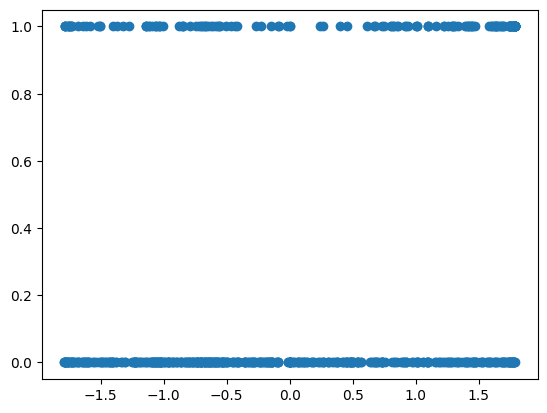

In [515]:
first_medals = pd.DataFrame(rows, columns=['Team Size', 'Participated Events', 'Sex', 'Events Difference', 'Host Continent', 'Normalized Team Size', 'Normalized Participated Events' 'First Medal'])
plt.scatter(first_medals['Normalized Participated Events'], first_medals['First Medal'])

In [517]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [518]:
X = first_medals[['Team Size', 'Participated Events', 'Sex', 'Events Difference', 'Host Continent', 'Normalized Team Size', 'Normalized Participated Events']].to_numpy()
y = first_medals[['First Medal']].to_numpy().flatten()

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
reg = LogisticRegression().fit(X_train, y_train)

score = reg.score(X_test, y_test)
print(reg.coef_)
print(score)

[[ 0.01356068  0.02956255  0.19907306  0.00872622 -0.06181238  0.08532558
   0.04914614  0.16274269]]
0.7784090909090909


In [520]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 42.76it/s]

[LightGBM] [Info] Number of positive: 106, number of negative: 302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259804 -> initscore=-1.046988
[LightGBM] [Info] Start training from score -1.046988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.78,0.65,0.65,0.75,0.02
RandomForestClassifier,0.78,0.65,0.65,0.75,0.12
LGBMClassifier,0.72,0.63,0.63,0.71,0.15
LogisticRegression,0.78,0.61,0.61,0.73,0.01
AdaBoostClassifier,0.76,0.61,0.61,0.72,0.08
NearestCentroid,0.68,0.61,0.61,0.68,0.01
Perceptron,0.74,0.60,0.60,0.71,0.02
ExtraTreesClassifier,0.75,0.59,0.59,0.71,0.06
LinearSVC,0.77,0.59,0.59,0.71,0.01
